# Обучение без учителя
---
Всем привет, сегодня мы разберем метод машинного обучения, когда у объекта изучения мы не знаем истинного значения, тем самым машина пытается сама найти какую-то закономерность на тех данных, которые мы ей дали на примере задачи, которая называется
## Задача кластеризации
Кластерный анализ - задача разбиения заданной выборки на непересекающиеся подмножества, которые называются *кластерами*. Каждый кластер должен состоять из схожих объектов, а объекты разных кластеров должны существенно отличаться.

Вот, например, на картинке есть выборка, где у каждого объекта две фичи - $x_1$ и $x_2$. Визуально заметно, что объекты разделяются на три отдельные группы - внутри группы объекты очень похожи, а вот между группами есть отличия. Синим крестиком я отметил центр кластера и добавил отрезки, соединяющие центры кластеров (для наглядности)

![clustering_example](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_example.png)

Задача кластеризации звучит таким образом: 
у нас есть координаты точек, все точки объединяются в два (или большее количество) кластеров, каждый кластер получает свой номер от $0$ до $N$. Мы хотим построить алгоритм, который
* обработает весь доступный массив точек
* выяснит автоматически количество кластеров
* для каждой новой точки наша модель будет выдавать номер кластера, к которому эта точка относится

Но для начала давайте вспомним из предыдущего урока, как, работая с координатами, находить расстояние между точками.
Для этого воспользуемся уже готовой формулой euclidean из scipy


In [3]:
from scipy.spatial.distance import euclidean
c1=[1.0,1.5]
c2=[2.0, 3.0]
dist=euclidean(c1,c2)
print(f"Расстояние между точками c1 и c2: {round(dist,3)}")

Расстояние между точками c1 и c2: 1.803


Самый простой метод решения поставленной выше задачи является использование метода K-средних. Гениальный метод, если честно, пахпх.

Алгоритм основан на следующей идее: давайте разместим центры кластеров в случайных местах, а потом будем их двигать таким образом, чтобы "центры" совпали с областями, где точек больше всего. Визуализация этого алгоритма отображена на gif:

![kmeans8](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/kmeans8.gif)

Но, как видите, в таком алгоритме есть своя проблема. из-за того что мы на самом деле делаем всё довольно случайно, количество кластеров без начальной обработки данных узнать невозможно, только если рассматривать данные графически, пытаясь найти закономерности. 

---
## Описание алгоритма
Алгоритм описывается следующим образом:
1. Выберите количество кластеров k. Количество кластеров можно задать с помощью эксперта (который скажет, сколько должно быть кластеров в датасете), либо выбрать количество кластеров интуитивно (я рекомендую всегда использовать количество кластеров $k=2$). О том, как выбирать количество кластеров автоматически, а не вручную, мы поговорим в моей следующей статье
1. Инициализировать *случайными значениями* координаты кластеров (они называются центроиды)
1. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе и раскрасить точку в цвет этого кластера
1. Переместить каждый центроид в центр выборки соответствующих ему элементов. Центр выборки находится как *среднее* всех элементов, входящих в выборку (отсюда и вторая часть названия алгоритма - усреднение).
1. Повторять до выполнения одного из условий
    1. Алгоритм сошелся (положение центроидов не меняется)
    1. Превышено максимально допустимое число итераций

In [6]:
import pickle
import numpy as np

# данные получены с помощью функции make_classification 
with open('7.10._clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [8]:
print(Y)

[1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1]


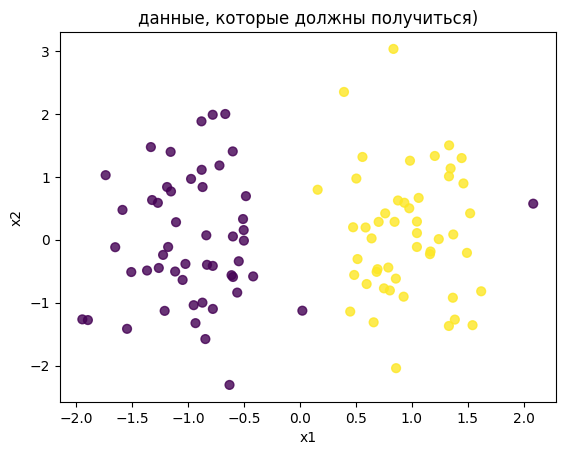

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='o', alpha=0.8, label='data')
plt.title("данные, которые должны получиться)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

В библиотеке sklearn уже есть готовая реализация алгоритма `sklearn.cluster.KMeans` - давайте просто применим её к нашим данным. Точки разобъём на два кластера (параметр *n_clusters=2*):

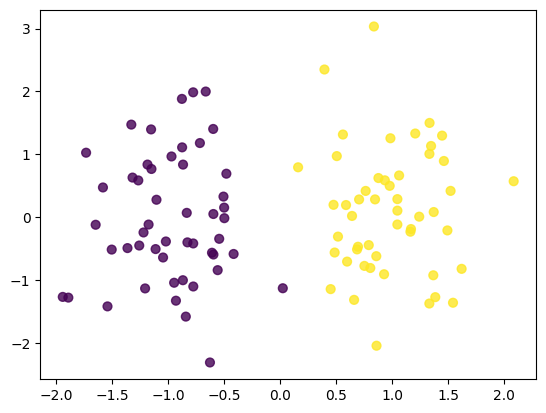

In [17]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=51)
kmeans_model.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show()

Круто! Как видите, машина самостоятельно смогла определить почти все точки именно так, как они и были изначально распределены. Причем всё, что мы дали машине кроме каких-то данных, это только количество кластеров, на которые мы хотим чтобы датасет был разбит
## Минусы
---
Как видите, алгоритм вроде бы простой и понятный, но и нем есть свои минусы. Представьте, что у нас не 100 точек, к примеру, а 100k. И получается, что для каждого прохода алгоритма придется высчитывать большое количество данных, причем в нашей случае это и квадратные корни, и просто квадраты, и тд. Крч получается довольно долго для больших данных

Также хочется выделить, что в зависимости от начальных точек, метод может не сойтись, поэтому обычно используют улучшенную версию этого метода, где проводится несколько таких алгоритмов, и выбирается среди них тот, который намного точнее сводится к реальным данным. Но об этом уже в следующий раз) До встречи!
